# Feature 

In [1]:
import requests as rq
import json
import numpy as np
import pickle
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import snownlp
from tqdm import tqdm
from time import sleep
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from textblob import TextBlob
from snownlp import SnowNLP


<font size=6>Read file</font>

In [2]:
test = pd.read_pickle('C:/Users/88690/Desktop/人工/NYCU-Intro-AI-Project/final-project/dataset/test_modified.pkl')
feat_data = 'feat_test_modified_v1_0.3'
save = True
test


,web_url,print_section,print_page,news_desk,section_name,type_of_material,word_count,subsection_name,pub_year,pub_month,...,abstract_len,abstract_dup,headline,headline_len,headline_dup,headline_kicker,len_lead,keywords,authors,n_comment
0,https://www.nytimes.com/2020/12/31/crosswords/...,NaN,NaN,Games,Crosswords & Games,News,670,NaN,2021,1,...,18,0,Party Hearty,2,0,"Wordplay, The CROSSWORD COLUMN",74,[Crossword Puzzles],[Caitlin Lovinger],124
1,https://www.nytimes.com/2021/01/01/nyregion/ny...,A,5,Metro,New York,News,1541,NaN,2021,1,...,29,0,Virus Numbers Are Surging. Why Is New York’s V...,11,0,None,58,"[Coronavirus (2019-nCoV), Vaccination and Immu...",[Joseph Goldstein],250
2,https://www.nytimes.com/2021/01/01/well/live/n...,D,6,Well,Well,News,1322,Live,2021,1,...,19,0,"For a Healthier 2021, Keep the Best Habits of ...",13,0,Well Challenge Day 1,23,"[Content Type: Service, Habits and Routines (B...",[Tara Parker-Pope],141
3,https://www.nytimes.com/2021/01/01/nyregion/85...,MB,1,Metropolitan,New York,News,1920,NaN,2021,1,...,28,0,How the Oldest Old Can Endure Even This,8,0,None,66,"[Elderly, Nursing Homes, Retirement Communitie...",[John Leland],186
4,https://www.nytimes.com/2021/01/01/business/GE...,B,1,Business,Business Day,News,1363,NaN,2021,1,...,16,0,A Monster Wind Turbine Is Upending an Industry,8,0,None,53,"[Wind Power, Alternative and Renewable Energy,...",[Stanley Reed],475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,https://www.nytimes.com/2022/12/30/crosswords/...,NaN,NaN,Games,Crosswords & Games,News,619,NaN,2022,12,...,11,0,Get Frothy,2,0,"Wordplay, The CROSSWORD COLUMN",100,[Crossword Puzzles],[Caitlin Lovinger],113
9991,https://www.nytimes.com/2022/12/31/crosswords/...,NaN,NaN,Games,Crosswords & Games,News,165,NaN,2022,12,...,8,156,Spelling Bee Forum,3,156,None,64,[Spelling Bee (Game)],[],324
9992,https://www.nytimes.com/interactive/2022/12/31...,NaN,NaN,The Upshot,The Upshot,Interactive Feature,0,NaN,2022,12,...,17,0,Readers Sent Us Pandemic Photos in 2020. Here’...,13,0,None,17,"[Coronavirus (2019-nCoV), Photography, Quarant...","[Alicia Parlapiano, Emily Badger, Claire Mille...",99
9993,https://www.nytimes.com/2022/12/31/technology/...,BU,1,SundayBusiness,Technology,News,2787,NaN,2022,12,...,29,0,Your Memories. Their Cloud.,4,0,None,61,"[Computers and the Internet, Archives and Reco...",[Kashmir Hill],150


<font size=6>Set bound of popularity</font>

In [3]:
median = test['n_comment'].median()
print(median)
#test['is_popular'] = test['n_comment'].apply(lambda x : 1 if x > median else 0)
test['is_popular'] = test['n_comment'].apply(lambda x : 1 if x > 135 else 0)
pop_count = 0
for i in test['is_popular']:
    if i:
        pop_count += 1
print('popular:    ' , pop_count / len(test))
print('not popular:' , 1 - pop_count / len(test))
#test = test.drop(columns = ['n_comment'])

57.0
popular:     0.2946062243570499
not popular: 0.70539377564295


In [4]:
print(test.columns)

Index(['web_url', 'print_section', 'print_page', 'news_desk', 'section_name',
       'type_of_material', 'word_count', 'subsection_name', 'pub_year',
       'pub_month', 'pub_day', 'pub_weekday', 'pub_time', 'abstract',
       'abstract_len', 'abstract_dup', 'headline', 'headline_len',
       'headline_dup', 'headline_kicker', 'len_lead', 'keywords', 'authors',
       'n_comment', 'is_popular'],
      dtype='object')


<font size=6>Hour</font>


pub_time
0     0.518657
1     0.463768
2     0.199095
3     0.180451
4     0.118421
5     0.185185
6     0.100000
7     0.320988
8     0.342561
9     0.309800
10    0.315436
11    0.131455
12    0.250000
13    0.198529
14    0.237069
15    0.294118
16    0.274194
17    0.280453
18    0.202532
19    0.349333
20    0.277397
21    0.317269
22    0.270175
23    0.472637
Name: is_popular, dtype: float64
0.08126195422656347


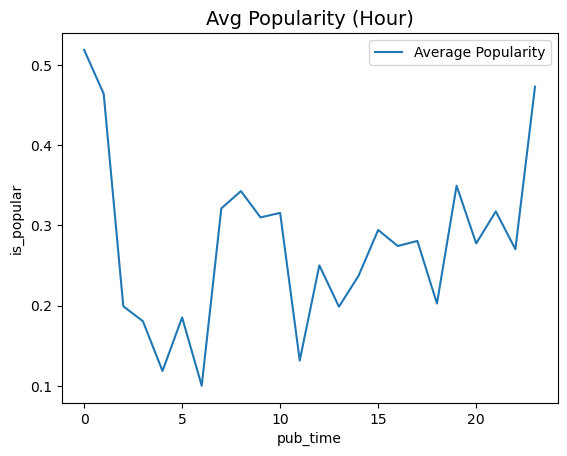

In [5]:
print(test.groupby('pub_time').mean()['is_popular'])
sns.lineplot(data = test.groupby('pub_time').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (Hour)', fontsize=14)
#plt.axvline(x = 3, linestyle= '--')

test['is_noon'] = test['pub_time'].apply(lambda x : 1 if (x <= 3 or x >= 23) else 0)
print(test.corr()['is_popular']['is_noon'])

<font size=6>Weekday</font>

In [6]:
print(test.groupby('pub_weekday').mean()['is_popular'])

pub_weekday
0    0.301863
1    0.294181
2    0.264289
3    0.274934
4    0.261519
5    0.456364
6    0.372990
Name: is_popular, dtype: float64


<font size=6>Day of week</font>

0.08563548646143528


Text(0.5, 1.0, 'Avg Popularity (Day of Week)')

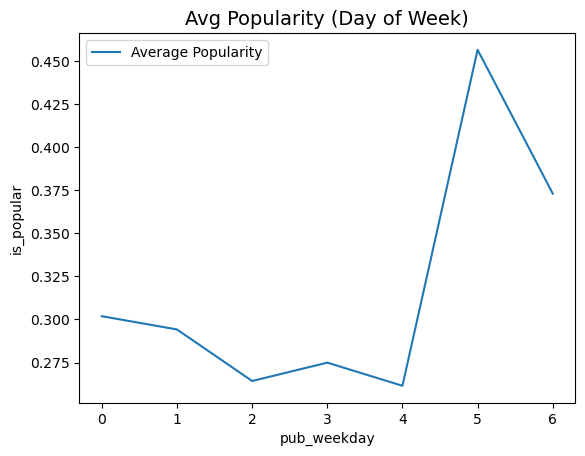

In [7]:
test['is_saturday'] = test['pub_weekday'].apply(lambda x : 1 if (x == 5) else 0)
print(test.corr()['is_popular']['is_saturday'])
sns.lineplot(data = test.groupby('pub_weekday').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (Day of Week)', fontsize=14)


<font size=6>Day of month</font>

pub_day
1     0.322388
2     0.295858
3     0.298817
4     0.330097
5     0.307167
6     0.289231
7     0.318538
8     0.325879
9     0.276923
10    0.278443
11    0.310241
12    0.317143
13    0.288809
14    0.272237
15    0.286982
16    0.259939
17    0.237822
18    0.295522
19    0.251572
20    0.309524
21    0.302260
22    0.289017
23    0.281159
24    0.275510
25    0.294118
26    0.289308
27    0.309677
28    0.299703
29    0.314465
30    0.315972
31    0.291045
Name: is_popular, dtype: float64


Text(0.5, 1.0, 'Avg Popularity (day)')

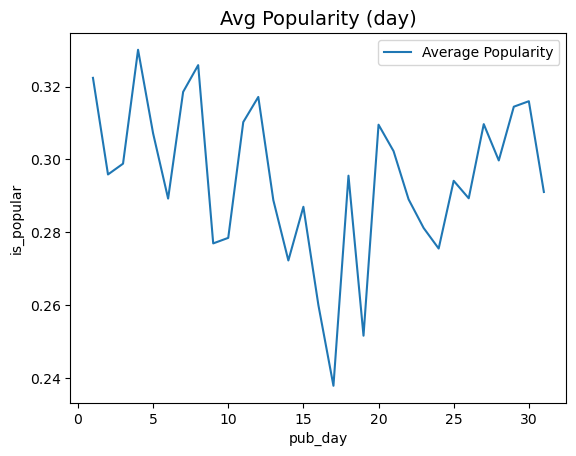

In [8]:
print(test.groupby('pub_day').mean()['is_popular'])
sns.lineplot(data = test.groupby('pub_day').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (day)', fontsize=14)

<font size=6>Month</font>

pub_month
1     0.330357
2     0.312977
3     0.244349
4     0.250000
5     0.266996
6     0.284856
7     0.342820
8     0.297129
9     0.300334
10    0.322763
11    0.290865
12    0.302071
Name: is_popular, dtype: float64
0.07896192465564224


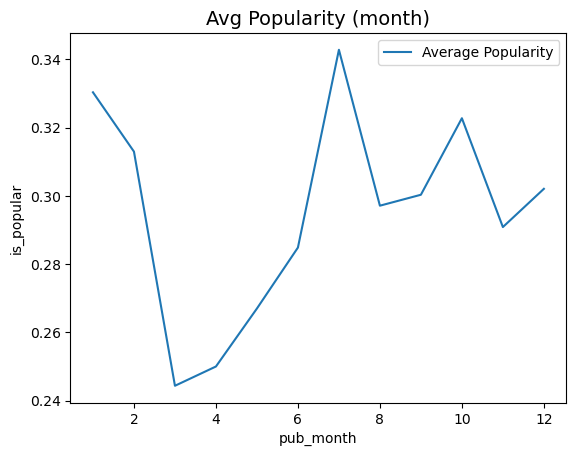

In [9]:
print(test.groupby('pub_month').mean()['is_popular'])
sns.lineplot(data = test.groupby('pub_month').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (month)', fontsize=14)
test['is_lowmonth'] = test['pub_time'].apply(lambda x : 0 if (x >= 3 and x <= 6) else 1)
print(test.corr()['is_popular']['is_lowmonth'])
#print(test.corr()['is_popular']['is_noon'])

<font size=6>News desk</font>

In [10]:
table = pd.read_pickle('./table/newsdesk_modified.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_news_desk'] = test['news_desk'].apply(lambda x : table[x] if x in table else mean)
test['feature_news_desk'] = test['group_by_news_desk'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_news_desk'])
print(test.corr()['is_popular']['feature_news_desk'])

0.43462760144476303
0.49560779095865065
0.49957813171828575


<font size=6>Section</font>

In [11]:
table_sec = pd.read_pickle('./table/section_modified.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_section_name'] = test['section_name'].apply(lambda x : table_sec[x] if x in table_sec else mean)
test['feature_section_name'] = test['group_by_section_name'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_section_name'])
print(test.corr()['is_popular']['feature_section_name'])

0.43462760144476303
0.4908235961820567
0.4963287624145495


<font size=6>Subsection</font>

In [12]:
table_sub = pd.read_pickle('./table/subsection_modified.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_subsection_name'] = test['subsection_name'].apply(lambda x : table_sub[x] if x in table_sub else mean)
test['feature_subsection_name'] = test['group_by_subsection_name'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_subsection_name'])
print(test.corr()['is_popular']['feature_subsection_name'])

0.43462760144476303
0.24980509146457175
0.23901542572032944


<font size=6>Material</font>

In [13]:
table_mat = pd.read_pickle('./table/material_modified.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_type_of_material'] = test['type_of_material'].apply(lambda x : table_mat[x] if x in table_mat else mean)
test['feature_type_of_material'] = test['group_by_type_of_material'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_type_of_material'])
print(test.corr()['is_popular']['feature_type_of_material'])

0.43462760144476303
0.4305523706444467
0.4236853101152237


<font size=6>Keyword</font>

<font size=5>Politics<font size=4>( party, congress, president )</font></font>


In [14]:
test['is_party'] = test['keywords'].apply(lambda x: 1 if ('Democratic Party' in x or 'Republican Party' in x ) else 0)
test['is_congress'] = test['keywords'].apply(lambda x: 1 if ('House of Representatives' in x or 'Senate' in x) else 0)
test['is_president'] = test['keywords'].apply(lambda x: 1 if ('Trump, Donald J' in x or 'Biden, Joseph R Jr' in x)else 0)
print(test.corr()['is_popular']['is_party'])
print(test.corr()['is_popular']['is_congress'])
print(test.corr()['is_popular']['is_president'])

0.25779392010988655
0.15091167697748248
0.25167377724005946


<font size=5>Event <font size=4>( Ukrainian_Russian_war, covid, Storming of the US Capitol )</font></font>


In [15]:
test['is_ukrainian_russian_war'] = test['keywords'].apply(lambda x: 1 if ('War and Armed Conflicts' in x or 'Ukraine' in x ) else 0)
test['is_covid'] = test['keywords'].apply(lambda x: 1 if 'Coronavirus (2019-nCoV)' in x else 0)
test['is_storm'] = test['keywords'].apply(lambda x: 1 if 'Storming of the US Capitol (Jan, 2021)' in x else 0)
print('ukrainian_russian_war     ', test.corr()['is_popular']['is_ukrainian_russian_war'])
print('Coronavirus               ', test.corr()['is_popular']['is_covid'])
print('Storming of the US Capitol', test.corr()['is_popular']['is_storm'])

ukrainian_russian_war      0.05690023807040928
Coronavirus                0.01403529514867358
Storming of the US Capitol 0.14088841448028608


<font size=5>News game<font size=4>(spelling bee, crossword puzzle)</font></font>

In [16]:
test['is_spell'] = test['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)' in x else 0)
test['is_crossword'] = test['keywords'].apply(lambda x: 1 if 'Crossword Puzzles' in x else 0)
test['is_game'] = test['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)'  in x or 'Crossword Puzzles' in x else 0)
print(test.corr()['is_popular']['is_spell'])
print(test.corr()['is_popular']['is_crossword'])
print(test.corr()['is_popular']['is_game'])

0.12470018501002042
-0.05464451207664204
0.03193012928129473


<font size=6>Headline length</font>

0.002888079641592147


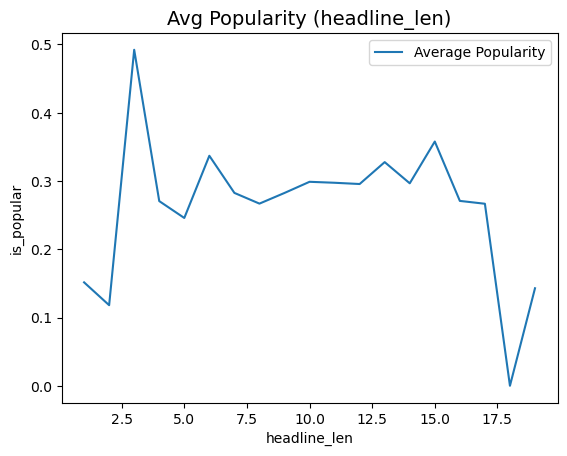

In [17]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('headline_len').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (headline_len)', fontsize=14)
print(test.corr()['is_popular']['headline_len'])

<font size=6>Abstract length</font>

-0.15110666464807337


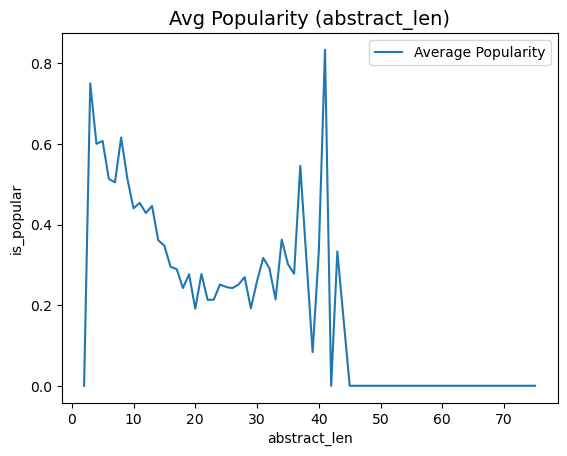

In [18]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('abstract_len').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (abstract_len)', fontsize=14)
print(test.corr()['is_popular']['abstract_len'])

<font size=6>Word count</font>

0.12597561069560645


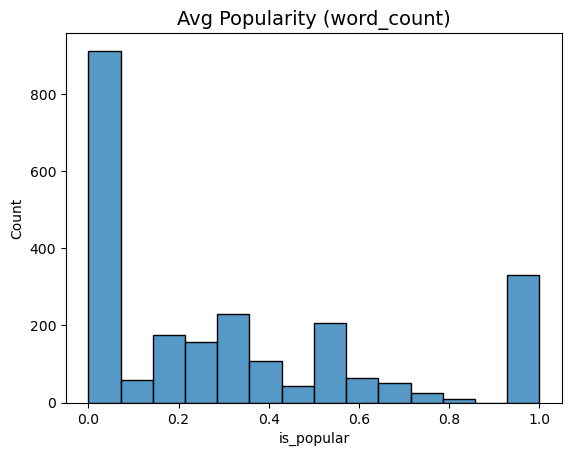

In [19]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.histplot(data = test.groupby('word_count').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (word_count)', fontsize=14)
print(test.corr()['is_popular']['word_count'])

0.1293973874051572


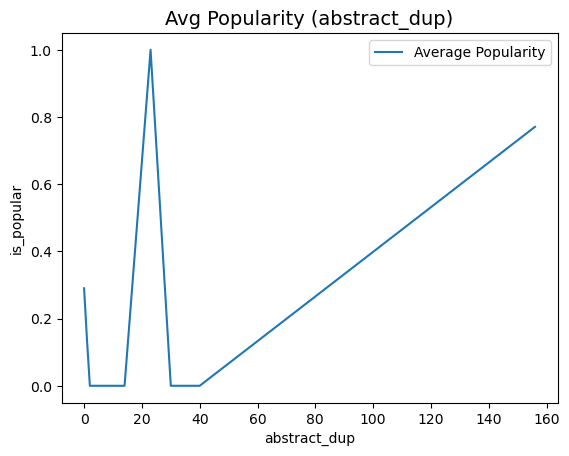

In [20]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('abstract_dup').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (abstract_dup)', fontsize=14)
print(test.corr()['is_popular']['abstract_dup'])

<font size=6>Lead paragraph length</font>

0.043113364520008315


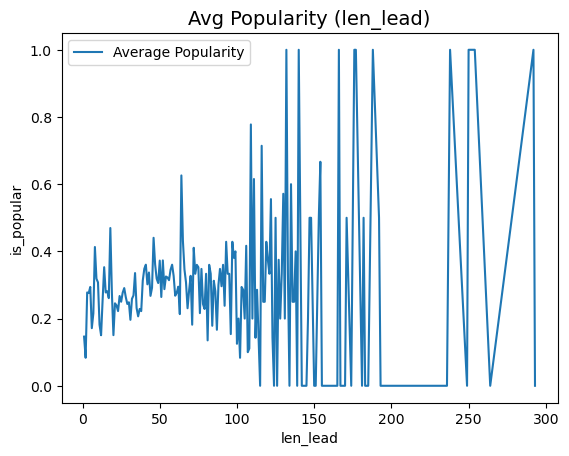

In [21]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('len_lead').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (len_lead)', fontsize=14)
print(test.corr()['is_popular']['len_lead'])

<font size = 6>Sentiment analyze</font>

<font size = 5>punctuation removal</font>

In [22]:
punct_list = list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
def remove_punctuation(headline):
    for punc in punct_list:
        if punc in headline:
            headline = headline.replace(punc, ' ')
    return headline
test['clean_headline'] = test['headline'].apply(lambda x: remove_punctuation(x))

<font size = 5>textblob</font>

In [23]:

text = "i am happy today."
blob = TextBlob(text)
# get the sentiment of the text
sentiment = blob.sentiment
print(sentiment)

Sentiment(polarity=0.8, subjectivity=1.0)


In [24]:
def tb_score_polar(headline):
    score = TextBlob(headline).sentiment[0]
    return score
def tb_score_subj(headline):
    score = TextBlob(headline).sentiment[1]
    return score
test['sentiment_tb_polar'] = test['clean_headline'].apply(lambda x : tb_score_polar(x))#-1 ~ 1
test['sentiment_tb_polar_abs'] = test['sentiment_tb_polar'].apply(lambda x :abs(x))#0 ~ 1
test['sentiment_tb_subj'] = test['clean_headline'].apply(lambda x : tb_score_subj(x))#0 ~ 1
test['sentiment_tb_pos'] = test['sentiment_tb_polar'].apply(lambda x : 1 if x > 0 else 0)#bool
print(test.corr()['is_popular']['sentiment_tb_polar'])
print(test.corr()['is_popular']['sentiment_tb_polar_abs'])
print(test.corr()['is_popular']['sentiment_tb_subj'])
print(test.corr()['is_popular']['sentiment_tb_pos'])

-0.04097559099680107
-0.0077514134665828726
-0.004589145820313453
-0.040959519285515174


<font size = 5>vader</font>

In [25]:
headline = 'today is a sunny day!'
analyzer = SentimentIntensityAnalyzer ()
sentiment_dict = analyzer.polarity_scores(headline)
print(sentiment_dict)

{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4753}


In [26]:
test['sentiment_vader_neg'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['neg'])#0 ~ 1
test['sentiment_vader_neu'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['neu'])#0 ~ 1
test['sentiment_vader_pos'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['pos'])#0 ~ 1
test['sentiment_vader_compound'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['compound'])#-1 ~ 1
test['sentiment_vader_compound_abs'] = test['sentiment_vader_compound'].apply(lambda x : abs(x))#0 ~ 1
print(test.corr()['is_popular']['sentiment_vader_neg'])
print(test.corr()['is_popular']['sentiment_vader_neu'])
print(test.corr()['is_popular']['sentiment_vader_pos'])
print(test.corr()['is_popular']['sentiment_vader_compound'])
print(test.corr()['is_popular']['sentiment_vader_compound_abs'])

0.10450683083394206
-0.07350464561922622
-0.011405384739387656
-0.07387287424087655
0.05945415276017387


<font size = 5>snownlp</font>

In [27]:
headline = 'i am happy'
sentence = 'hello","why is it not working?!'
s = SnowNLP(headline)
print(s.sentiments)

0.1837233963534416


In [28]:
test['sentiment_snow'] = test['clean_headline'].apply(lambda x : SnowNLP(x).sentiments)#0 ~ 1
test['sentiment_snow_abs'] = test['sentiment_snow'].apply(lambda x : 2 * abs(x - 0.5))#-1 ~ 1
test['sentiment_snow_pos'] = test['sentiment_snow'].apply(lambda x : 1 if x > 0.5 else 0)#bool
print(test.corr()['is_popular']['sentiment_snow'])
print(test.corr()['is_popular']['sentiment_snow_abs'])
print(test.corr()['is_popular']['sentiment_snow_pos'])

-0.016976774237752783
0.04821231719914329
0.01852472423117788


<font size = 6>abstract</font>

In [29]:
#test = test.drop(13348)
test['clean_abstract'] = test['abstract'].apply(lambda x: remove_punctuation(x))

<font size = 5>textblob</font>

In [30]:
def tb_score_polar(headline):
    score = TextBlob(headline).sentiment[0]
    return score
def tb_score_subj(headline):
    score = TextBlob(headline).sentiment[1]
    return score
test['sentiment_abstract_tb_polar'] = test['clean_abstract'].apply(lambda x : tb_score_polar(x))#-1 ~ 1
test['sentiment_abstract_tb_polar_abs'] = test['sentiment_abstract_tb_polar'].apply(lambda x :abs(x))#0 ~ 1
test['sentiment_abstract_tb_subj'] = test['clean_abstract'].apply(lambda x : tb_score_subj(x))#0 ~ 1
test['sentiment_abstract_tb_pos'] = test['sentiment_abstract_tb_polar'].apply(lambda x : 1 if x > 0 else 0)#bool
test['sentiment_abstract_tb_neg'] = test['sentiment_abstract_tb_polar'].apply(lambda x : 1 if x < 0 else 0)#bool
print(test.corr()['is_popular']['sentiment_abstract_tb_polar'])
print(test.corr()['is_popular']['sentiment_abstract_tb_polar_abs'])
print(test.corr()['is_popular']['sentiment_abstract_tb_subj'])
print(test.corr()['is_popular']['sentiment_abstract_tb_pos'])
print(test.corr()['is_popular']['sentiment_abstract_tb_neg'])

-0.04910387682269725
-0.04116438027934616
-0.030661248363680952
-0.0831146763882077
0.008186112007417845


<font size = 5>vader</font>

In [31]:
test['sentiment_abstract_vader_neg'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['neg'])#0 ~ 1
test['sentiment_abstract_vader_neu'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['neu'])#0 ~ 1
test['sentiment_abstract_vader_pos'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['pos'])#0 ~ 1
test['sentiment_abstract_vader_compound'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['compound'])#-1 ~ 1
test['sentiment_abstract_vader_compound_abs'] = test['sentiment_vader_compound'].apply(lambda x : abs(x))#0 ~ 1
print(test.corr()['is_popular']['sentiment_abstract_vader_neg'])
print(test.corr()['is_popular']['sentiment_abstract_vader_neu'])
print(test.corr()['is_popular']['sentiment_abstract_vader_pos'])
print(test.corr()['is_popular']['sentiment_abstract_vader_compound'])
print(test.corr()['is_popular']['sentiment_abstract_vader_compound_abs'])

0.14607603467637062
-0.13069530964754397
0.03368399684861083
-0.07596243290509468
0.05945415276017387


<font size = 5>snownlp</font>

In [32]:
test['sentiment_abstract_snow'] = test['clean_abstract'].apply(lambda x : SnowNLP(x).sentiments)#0 ~ 1
test['sentiment_abstract_snow_abs'] = test['sentiment_abstract_snow'].apply(lambda x : 2 * abs(x - 0.5))#-1 ~ 1
test['sentiment_abstract_snow_pos'] = test['sentiment_abstract_snow'].apply(lambda x : 1 if x > 0.5 else 0)#bool
print(test.corr()['is_popular']['sentiment_abstract_snow'])
print(test.corr()['is_popular']['sentiment_abstract_snow_abs'])
print(test.corr()['is_popular']['sentiment_abstract_snow_pos'])

0.10281891736181059
-0.12301147821477917
0.02351913467101872


In [33]:
fea_list = test.corr()['is_popular']
fea_list = fea_list.sort_values(key = lambda x : abs(x), ascending=False)
print(fea_list)

is_popular                               1.000000
n_comment                                0.699792
feature_news_desk                        0.499578
feature_section_name                     0.496329
group_by_news_desk                       0.495608
group_by_section_name                    0.490824
group_by_type_of_material                0.430552
feature_type_of_material                 0.423685
is_party                                 0.257794
is_president                             0.251674
group_by_subsection_name                 0.249805
feature_subsection_name                  0.239015
abstract_len                            -0.151107
is_congress                              0.150912
sentiment_abstract_vader_neg             0.146076
is_storm                                 0.140888
sentiment_abstract_vader_neu            -0.130695
abstract_dup                             0.129397
headline_dup                             0.127586
word_count                               0.125976


In [34]:

file = pd.read_pickle('./feature/feat_modified_v1_0.3.pkl')    
print(file.columns)
for col in test.columns:
    if col not in file.columns:
        test = test.drop(columns=col)  

Index(['word_count', 'abstract_len', 'len_lead', 'is_popular', 'is_noon',
       'is_saturday', 'is_lowmonth', 'group_by_news_desk', 'feature_news_desk',
       'group_by_section_name', 'feature_section_name',
       'group_by_subsection_name', 'feature_subsection_name',
       'group_by_type_of_material', 'feature_type_of_material', 'is_party',
       'is_congress', 'is_president', 'is_ukrainian_russian_war', 'is_storm',
       'is_spell', 'is_crossword', 'is_game', 'sentiment_vader_neg',
       'sentiment_vader_neu', 'sentiment_vader_compound',
       'sentiment_vader_compound_abs', 'sentiment_snow_abs',
       'sentiment_abstract_tb_polar', 'sentiment_abstract_tb_polar_abs',
       'sentiment_abstract_tb_subj', 'sentiment_abstract_tb_pos',
       'sentiment_abstract_vader_neg', 'sentiment_abstract_vader_neu',
       'sentiment_abstract_vader_pos', 'sentiment_abstract_vader_compound',
       'sentiment_abstract_vader_compound_abs', 'sentiment_abstract_snow',
       'sentiment_abstrac

In [35]:
print(test.corr()['is_popular'])

word_count                               0.125976
abstract_len                            -0.151107
len_lead                                 0.043113
is_popular                               1.000000
is_noon                                  0.081262
is_saturday                              0.085635
is_lowmonth                              0.078962
group_by_news_desk                       0.495608
feature_news_desk                        0.499578
group_by_section_name                    0.490824
feature_section_name                     0.496329
group_by_subsection_name                 0.249805
feature_subsection_name                  0.239015
group_by_type_of_material                0.430552
feature_type_of_material                 0.423685
is_party                                 0.257794
is_congress                              0.150912
is_president                             0.251674
is_ukrainian_russian_war                 0.056900
is_storm                                 0.140888


<AxesSubplot:>

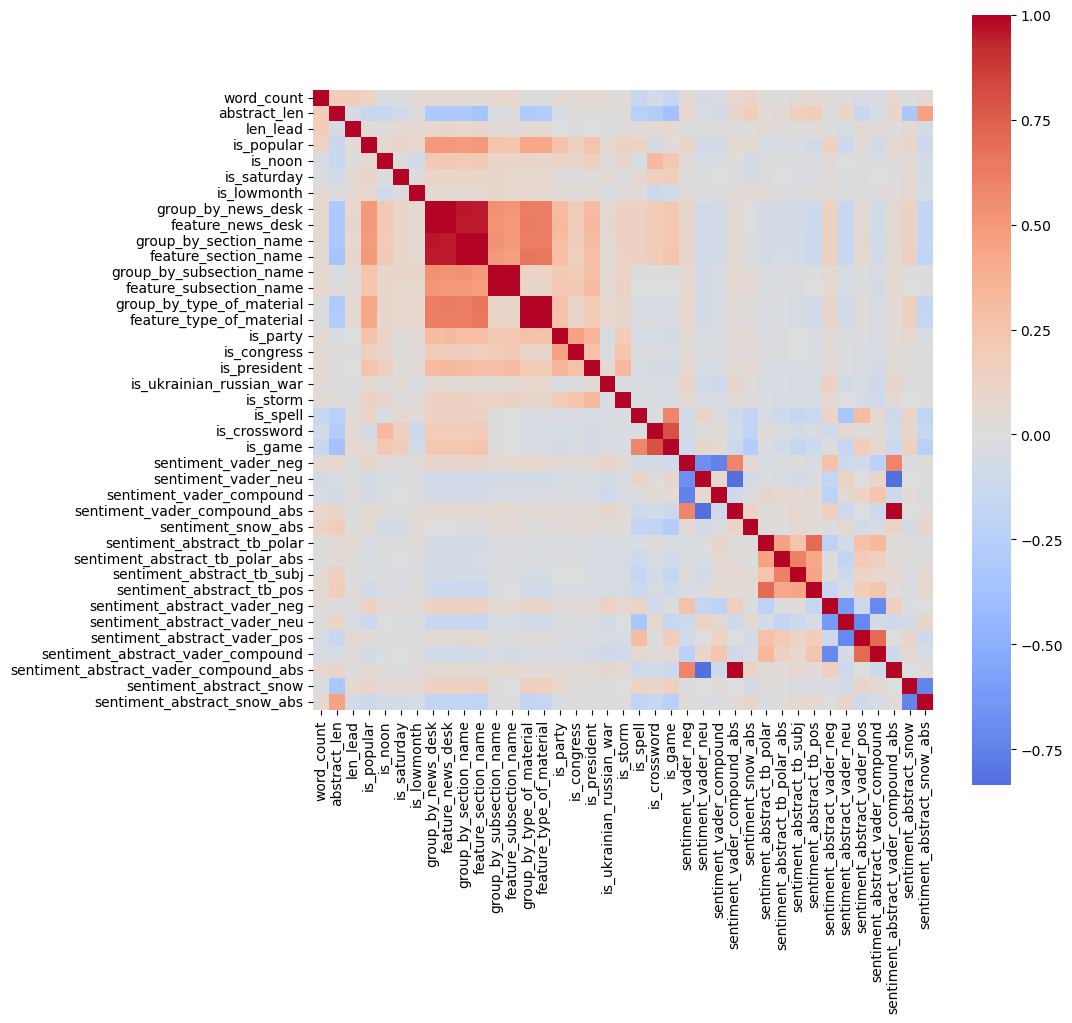

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), cmap='coolwarm', annot=False, square=True, fmt='.2f', cbar=True, center = 0)

In [37]:
'''  
test = test.drop(columns=['n_comment', 'group_by_news_desk', 'group_by_section_name', 'group_by_subsection_name',
                            'group_by_type_of_material', 'feature_news_desk', 'feature_subsection_name',
                            'sentiment_vader_neu', 'sentiment_vader_compound_abs', 'sentiment_abstract_snow',
                            'sentiment_abstract_vader_compound', 'sentiment_vader_compound', 'sentiment_abstract_vader_neu',
                            'is_game', 'sentiment_tb_pos', 'sentiment_abstract_tb_pos'])
test.columns
'''
            

"  \ntest = test.drop(columns=['n_comment', 'group_by_news_desk', 'group_by_section_name', 'group_by_subsection_name',\n                            'group_by_type_of_material', 'feature_news_desk', 'feature_subsection_name',\n                            'sentiment_vader_neu', 'sentiment_vader_compound_abs', 'sentiment_abstract_snow',\n                            'sentiment_abstract_vader_compound', 'sentiment_vader_compound', 'sentiment_abstract_vader_neu',\n                            'is_game', 'sentiment_tb_pos', 'sentiment_abstract_tb_pos'])\ntest.columns\n"

In [38]:
test.columns

Index(['word_count', 'abstract_len', 'len_lead', 'is_popular', 'is_noon',
       'is_saturday', 'is_lowmonth', 'group_by_news_desk', 'feature_news_desk',
       'group_by_section_name', 'feature_section_name',
       'group_by_subsection_name', 'feature_subsection_name',
       'group_by_type_of_material', 'feature_type_of_material', 'is_party',
       'is_congress', 'is_president', 'is_ukrainian_russian_war', 'is_storm',
       'is_spell', 'is_crossword', 'is_game', 'sentiment_vader_neg',
       'sentiment_vader_neu', 'sentiment_vader_compound',
       'sentiment_vader_compound_abs', 'sentiment_snow_abs',
       'sentiment_abstract_tb_polar', 'sentiment_abstract_tb_polar_abs',
       'sentiment_abstract_tb_subj', 'sentiment_abstract_tb_pos',
       'sentiment_abstract_vader_neg', 'sentiment_abstract_vader_neu',
       'sentiment_abstract_vader_pos', 'sentiment_abstract_vader_compound',
       'sentiment_abstract_vader_compound_abs', 'sentiment_abstract_snow',
       'sentiment_abstrac

<AxesSubplot:>

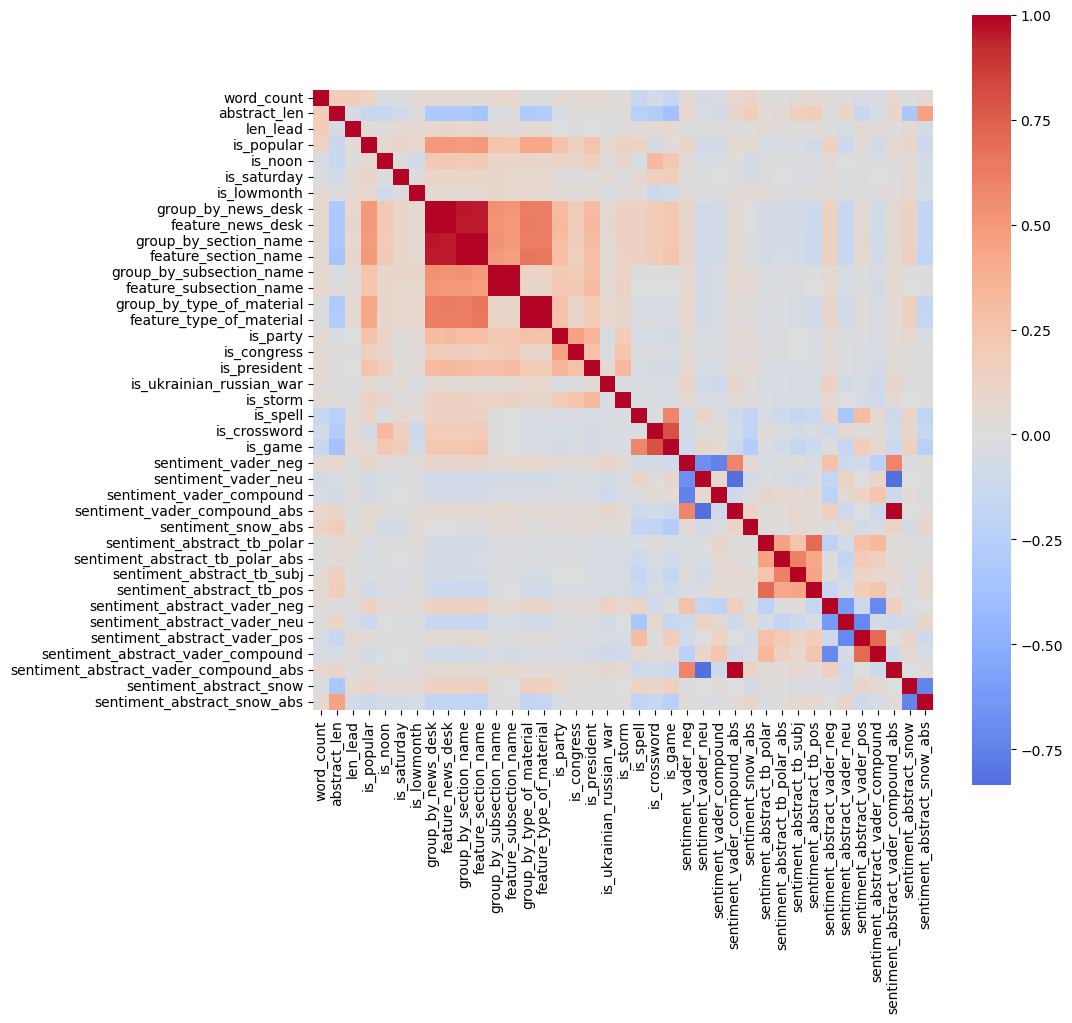

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), cmap='coolwarm', annot=False, square=True, fmt='.2f', cbar=True, center = 0)

<AxesSubplot:>

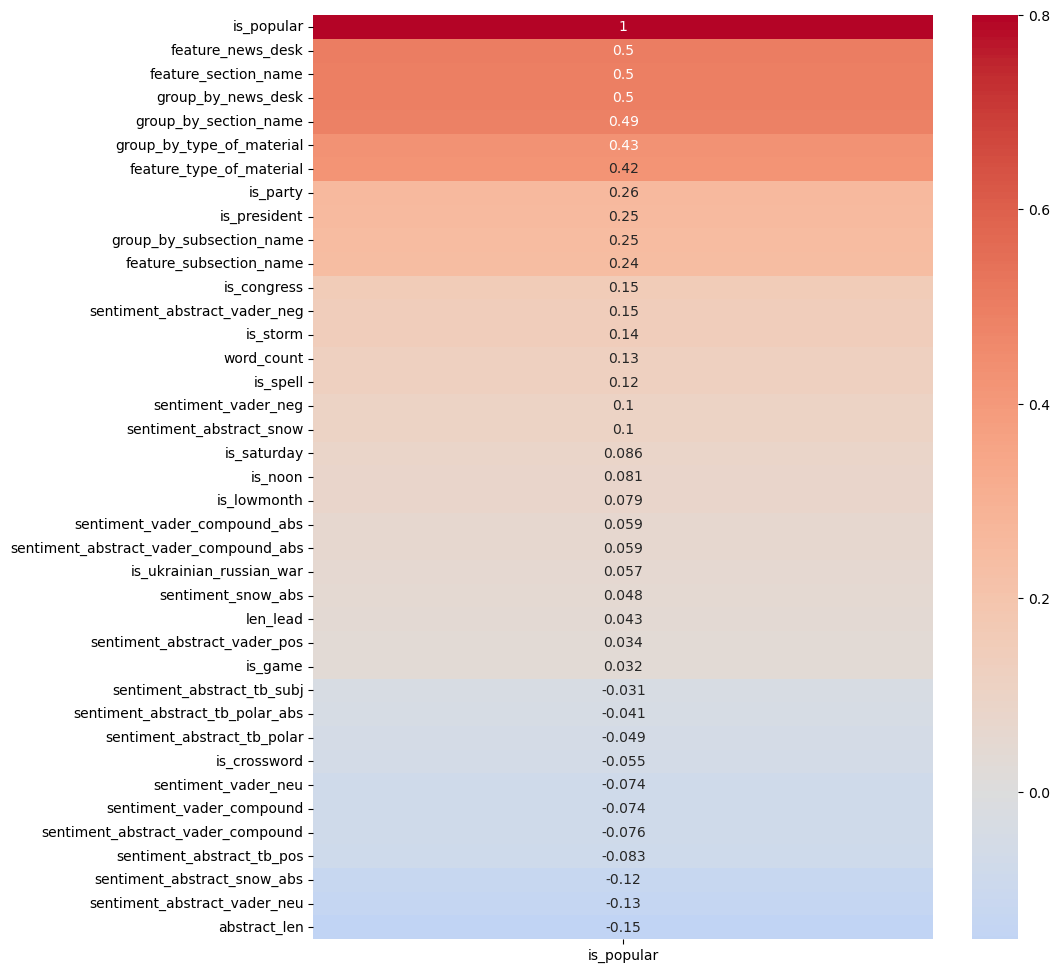

In [40]:
plt.figure(figsize=(10,12))
sns.heatmap(test.corr()[['is_popular']].sort_values(ascending=False, by='is_popular'), 
            cmap='coolwarm', annot=True, vmax=0.8, center=0)

# Check the features

In [41]:
if save:
    test.to_pickle(f'./feature/{feat_data}.pkl')
    feat = pd.read_pickle(f'./feature/{feat_data}.pkl')
print(feat.columns)
feat

Index(['word_count', 'abstract_len', 'len_lead', 'is_popular', 'is_noon',
       'is_saturday', 'is_lowmonth', 'group_by_news_desk', 'feature_news_desk',
       'group_by_section_name', 'feature_section_name',
       'group_by_subsection_name', 'feature_subsection_name',
       'group_by_type_of_material', 'feature_type_of_material', 'is_party',
       'is_congress', 'is_president', 'is_ukrainian_russian_war', 'is_storm',
       'is_spell', 'is_crossword', 'is_game', 'sentiment_vader_neg',
       'sentiment_vader_neu', 'sentiment_vader_compound',
       'sentiment_vader_compound_abs', 'sentiment_snow_abs',
       'sentiment_abstract_tb_polar', 'sentiment_abstract_tb_polar_abs',
       'sentiment_abstract_tb_subj', 'sentiment_abstract_tb_pos',
       'sentiment_abstract_vader_neg', 'sentiment_abstract_vader_neu',
       'sentiment_abstract_vader_pos', 'sentiment_abstract_vader_compound',
       'sentiment_abstract_vader_compound_abs', 'sentiment_abstract_snow',
       'sentiment_abstrac

,word_count,abstract_len,len_lead,is_popular,is_noon,is_saturday,is_lowmonth,group_by_news_desk,feature_news_desk,group_by_section_name,...,sentiment_abstract_tb_polar_abs,sentiment_abstract_tb_subj,sentiment_abstract_tb_pos,sentiment_abstract_vader_neg,sentiment_abstract_vader_neu,sentiment_abstract_vader_pos,sentiment_abstract_vader_compound,sentiment_abstract_vader_compound_abs,sentiment_abstract_snow,sentiment_abstract_snow_abs
0,670,18,74,0,1,0,0,0.777445,0.8,0.777557,...,0.456566,0.640404,1,0.075,0.570,0.355,0.7506,0.4019,0.386396,0.227209
1,1541,29,58,1,0,0,1,0.379630,0.4,0.417652,...,0.117677,0.734848,1,0.000,1.000,0.000,0.0000,0.4019,0.113273,0.773454
2,1322,19,23,1,0,0,1,0.740187,0.7,0.725724,...,0.500000,0.500000,1,0.000,0.724,0.276,0.6249,0.1045,0.206117,0.587767
3,1920,28,66,1,0,0,1,0.561338,0.6,0.417652,...,0.333333,0.416667,1,0.109,0.821,0.070,-0.0387,0.0000,0.009966,0.980068
4,1363,16,53,1,0,0,1,0.519562,0.5,0.517452,...,0.050000,0.700000,1,0.000,0.870,0.130,0.2732,0.0000,0.136146,0.727709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,619,11,100,0,1,1,0,0.777445,0.8,0.777557,...,0.000000,0.000000,0,0.000,0.682,0.318,0.6369,0.0000,0.223390,0.553220
9991,165,8,64,1,0,1,1,0.777445,0.8,0.777557,...,0.000000,0.000000,0,0.179,0.446,0.375,0.2960,0.0000,0.396490,0.207019
9992,0,17,17,0,0,1,1,0.730769,0.7,0.771574,...,0.700000,0.600000,1,0.293,0.475,0.232,-0.5468,0.0000,0.218673,0.562655
9993,2787,29,61,1,0,1,1,0.585034,0.6,0.542005,...,0.250000,0.475000,1,0.000,0.837,0.163,0.6416,0.0000,0.271381,0.457238


Index([ 'print_section', 'print_page', 'pub_year',
       'abstract','abstract_dup', 'headline', 
       'headline_dup', 'headline_kicker', 'len_lead', 
       'is_popular'],
      dtype='object')